<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_17_Matplotlib Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)   

## 🟩 Data Scientist Hourly Salaries (2.17.1)

In [4]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

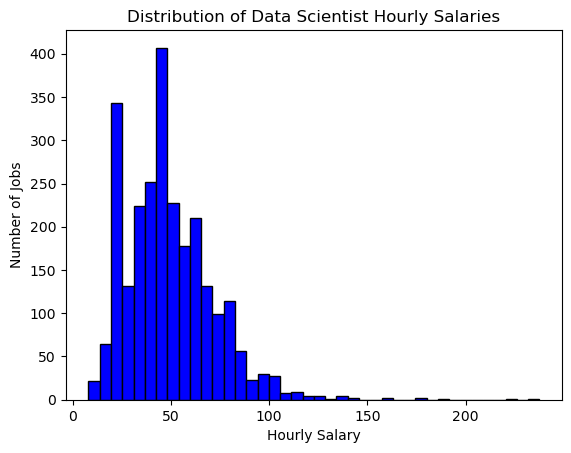

In [6]:
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

---

## 🟨 Job Postings by Number of Skills (2.17.2)

In [9]:
df_skills = df.dropna(subset='job_skills').copy()


In [11]:
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

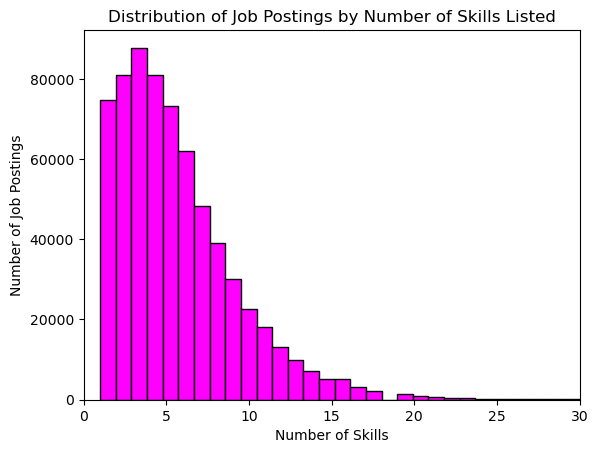

In [18]:
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.xlim(0, 30)
plt.show()

---

## 🟥 Data Engineer Salaries (2.17.3)

In [15]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])


In [16]:
# Get mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()


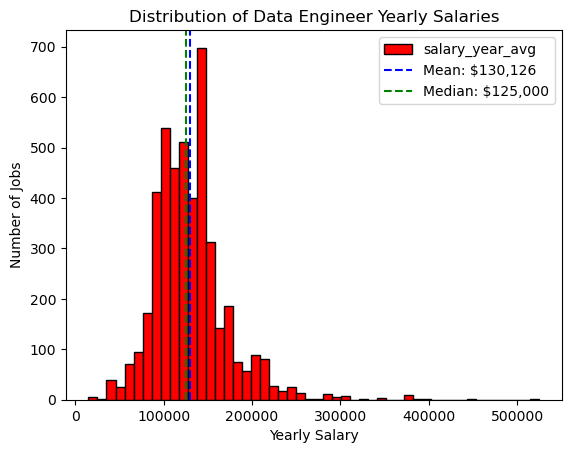

In [17]:
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')

# plot the histogram with mean and median salary
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()

---